In [1]:
import numpy as np
import scipy as sp
from scipy import optimize,special,integrate
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import copy

from lanczos_bin import *

from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
Ns = [200,700,2000,10000]
n_repeat = 1000
K = 151

In [4]:
OP_max = np.zeros((len(Ns),n_repeat,K))

np.random.seed(0)
for j,N in enumerate(Ns):
    for r in range(n_repeat):
        print(j,r)
        clear_output(wait=True)

        v = np.random.randn(N)
        v /= np.linalg.norm(v)

        A = GOE_tridiag_model(N,N)#sp.sparse.spdiags(Λ[N][r],0,N,N)

        Q,(αs_ro,βs_ro) = lanczos_reorth(A,v,K,K)

        Nx = 2000
        X = np.linspace(-1,1,Nx,endpoint=True)
        tx = np.zeros((Nx,K),dtype=np.longdouble)
        tx[:,0] = np.ones(Nx)
        tx[:,1] = (X*tx[:,0]-αs_ro[0]*tx[:,0])
        tx[:,1] /= βs_ro[0]


        for i in range(2,K):
            tx[:,i] = (X*tx[:,i-1]-αs_ro[i-1]*tx[:,i-1])-βs_ro[i-2]*tx[:,i-2]
            tx[:,i] /= βs_ro[i-1]
        
        OP_max[j,r] = np.max(tx,axis=0)

3 424


In [5]:
np.savez_compressed('OP_max',OP_max,allow_pickle=True)

In [6]:
npz = np.load('OP_max.npz',allow_pickle=True)
OP_max = npz.f.arr_0

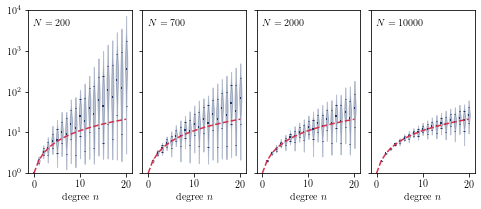

In [7]:
K_small = 21

fig,axs = plt.subplots(1,len(Ns),figsize=(8,3),sharey=True)
fig.subplots_adjust(wspace=.1)

#plt.yscale('log')

c = [c3,c4,c5][::-1]
σ = .05
for j,N in enumerate(Ns):
    
    axs[j].text(.05,.95,f'$N = {N}$',ha='left', va='top', transform=axs[j].transAxes)

    nan_list = np.sum(np.isnan(OP_max[j]),axis=1).astype(bool)
    violin_parts = axs[j].violinplot(np.log10(OP_max[j][~nan_list,:K_small]),positions=np.arange(K_small),quantiles=[[1-σ,σ]]*K_small,showmeans=True,
        showextrema=False)

    for partname in ['cquantiles','cmeans']:
        vp = violin_parts[partname]
        vp.set_edgecolor(c1)
        vp.set_linewidth(1)
    vp.set_linewidth(2)

    for vp in violin_parts['bodies']:
        vp.set_facecolor(c1)
        vp.set_edgecolor(c1)

    axs[j].plot(np.log10(np.arange(K_small)+1),color=c3,ls='--')
    
    axs[j].set_xlabel('degree $n$')

axs[0].set_ylim(0,4)
axs[0].set_yticks(list(range(5)))
axs[0].set_yticklabels([f'$10^{i}$' for i in range(5)])

plt.savefig('imgs/GOE_kN_growth.pdf')

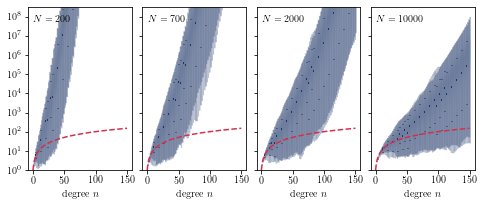

In [8]:
fig,axs = plt.subplots(1,len(Ns),figsize=(8,3),sharey=True)
fig.subplots_adjust(wspace=.1)

#plt.yscale('log')

axs[0].set_ylim(0,8.5)
axs[0].set_yticks(list(range(9)))
axs[0].set_yticklabels([f'$10^{i}$' for i in range(9)])

c = [c3,c4,c5][::-1]
σ = .05
for j,N in enumerate(Ns):
    
    axs[j].text(.05,.95,f'$N = {N}$',ha='left', va='top', transform=axs[j].transAxes)

    nan_list = np.sum(np.isnan(OP_max[j]),axis=1).astype(bool)
    violin_parts = axs[j].violinplot(np.log10(OP_max[j,~nan_list]),positions=np.arange(K),quantiles=[[1-σ,σ]]*K,showmeans=True,
        showextrema=False)

    for partname in ['cquantiles','cmeans']:
        vp = violin_parts[partname]
        vp.set_edgecolor(c1)
        vp.set_linewidth(1)
    vp.set_linewidth(2)

    for vp in violin_parts['bodies']:
        vp.set_facecolor(c1)
        vp.set_edgecolor(c1)

    axs[j].plot(np.log10(np.arange(K)+1),color=c3,ls='--')
#    axs[j].axhline(7,color='k',ls=':')
    
    axs[j].set_xticks([0,50,100,150])
    axs[j].set_xlabel('degree $n$')

plt.savefig('imgs/GOE_kN_growth_big.pdf')